In [2]:
import numpy as np
import random
import read_map as rm
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
map_test = rm.map_read('corridor.png')
map_arr = np.asarray(map_test)

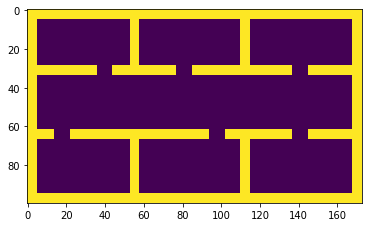

In [4]:
plt.imshow(map_test)

In [5]:
map_arr = np.asarray(map_test)

In [6]:
map_arr.shape[1]

173

In [7]:
def move_bot(direction,position,map_arr,move_prob,reward_dict):
    
    hit_wall = reward_dict['hit_wall']
    movement = reward_dict['movement']
    reward = movement
    
    if direction == 0:
        if map_arr[position[0]-1,position[1]] == 0:
            position[0] -= 1
            
        else:
            reward += hit_wall
        
    if direction == 1:
        if map_arr[position[0],position[1]+1] == 0:
            position[1] += 1
        
        else:
            reward += hit_wall
        
        
    if direction == 2:
        if map_arr[position[0]+1,position[1]] == 0:
            position[0] += 1
        else:
            reward +=  hit_wall    
            
    if direction == 3:
        if map_arr[position[0],position[1]-1] == 0:
            position[1] -= 1
        else:
            reward += hit_wall
        
    return position, reward


In [8]:
def init_available_moves(map_arr):
    available_moves = [0,1,2,3,4]
    i_row = map_arr.shape[0]
    i_col = map_arr.shape[1]
    possible_movement_array = np.empty(map_arr.shape, dtype='object')
    
    for n_row in range(i_row):
        for n_col in range(i_col):
            if map_arr[n_row][n_col] == 0:
                possible_movement_array[n_row][n_col] = available_moves
    
    return possible_movement_array
                
                
            

In [9]:
def choose_move(possible_movement_array, position):
    return random.choice(possible_movement_array[position[0],position[1]])

In [10]:
def calculate_reward(map_arr,reward_dict,move_prob, goal_position, previous_values = 'empty',extra_val = -1000):
    wrong_direc = move_prob
    movement = reward_dict['movement']
    if previous_values == 'empty':
        previous_values = create_zero_initial_values(map_arr,extra_val)
    new_values = np.copy(previous_values).tolist()
    i_row = map_arr.shape[0]
    i_col = map_arr.shape[1]
    for n_row in range(i_row):
        for n_col in range(i_col):
            current_val = 0
            
            if previous_values[n_row][n_col] != extra_val:
                current_val = previous_values[n_row][n_col] + movement
                #can add more in here for checking more areas
                for position in [[n_row,n_col]]:
                    if map_arr[position[0]][position[1]] == 0:
                        
                        current_val += reward_on_spot(position,map_arr,reward_dict,goal_position,move_prob,previous_values)
                new_values[n_row][n_col] = current_val
                
            
    return new_values
           
            
            
                
                    
                    
    

In [11]:
def create_zero_initial_values(map_arr,extra_val):
    i_row = map_arr.shape[0]
    i_col = map_arr.shape[1]
    initial_values_array = np.empty(map_arr.shape, dtype='float')
    for n_row in range(i_row):
        for n_col in range(i_col):
            if map_arr[n_row][n_col] == 0:
                initial_values_array[n_row][n_col] = 0
            else:
                initial_values_array[n_row][n_col] = extra_val
    return initial_values_array
    

In [12]:
def reward_on_spot(position,map_arr,reward_dict,goal_position,move_prob,previous_plan):
    hit_wall = reward_dict['hit_wall']
    reached_goal = reward_dict['reached_goal']
    n_row = position[0]
    n_col = position[1]
    move_prob
    current_val = 0
    surrounding_cell = 0
    #check up
    if map_arr[n_row-1][n_col] == 1:
        current_val += hit_wall*move_prob
    elif map_arr[n_row-1][n_col] == 0:
        current_val += previous_plan[n_row-1][n_col]*move_prob
        surrounding_cell += 1
        
    #check down
    if map_arr[n_row+1][n_col] == 1:
        current_val += hit_wall*move_prob
    elif map_arr[n_row+1][n_col] == 0:
        current_val += previous_plan[n_row+1][n_col]*move_prob
        surrounding_cell += 1
        
    #check left
    if map_arr[n_row][n_col-1] == 1:
        current_val += hit_wall*move_prob
    elif map_arr[n_row][n_col-1] == 0:
        current_val += previous_plan[n_row][n_col-1]*move_prob
        surrounding_cell += 1
        
    #check right
    
    if map_arr[n_row][n_col+1] == 1:
        current_val += hit_wall*move_prob
    elif map_arr[n_row][n_col+1] == 0:
        current_val += previous_plan[n_row][n_col+1]*move_prob
        surrounding_cell += 1
        
    
    
    #goal
    if [n_row-1,n_col] == goal_position or [n_row+1,n_col] == goal_position or [n_row,n_col-1] == goal_position or [n_row,n_col+1] == goal_position:
        current_val += reached_goal*move_prob
    elif [n_row,n_col] == goal_position:
        current_val += reached_goal
    current_val = current_val/surrounding_cell    
    return current_val
    
    

In [13]:
def choose_route(map_arr,plan,start_spot,terminal_states):
    at_terminal = False
    position = start_spot
    row_number = map_arr.shape[0]
    col_number = map_arr.shape[1]
    route = [position]
    while at_terminal == False:
        surrounding = [[position[0]-1,position[1]], [position[0]+1,position[1]], [position[0],position[1]-1], [position[0],position[1]+1]]
        for i in range(len(surrounding)-1,-1,-1):
            if surrounding[i][0] == row_number or surrounding[i][1] == col_number or surrounding[i][0] == 0 or surrounding[i][1] == 0 or map_arr[surrounding[i][0]][surrounding[i][1]] != 0 or surrounding[i] in route:
                surrounding.pop(i)
        weight_list = []
        for i_poss in surrounding:
            weight_list.append(plan[i_poss[0]][i_poss[1]])
        
        
        route.append(surrounding[weight_list.index(max(weight_list))])
        position = route[-1]
        print(position)
        
        
        if route[-1] in terminal_states:
            at_terminal = True
        
    return route

In [14]:
def choose_route_look_ahead(map_arr,plan,start_spot,terminal_states):
    at_terminal = False
    position = start_spot
    row_number = map_arr.shape[0]
    col_number = map_arr.shape[1]
    route = [position]
    while at_terminal == False:
        surrounding = [[position[0]-1,position[1]], [position[0]+1,position[1]], [position[0],position[1]-1], [position[0],position[1]+1]]
        for i in range(len(surrounding)-1,-1,-1):
            if surrounding[i][0] == row_number or surrounding[i][1] == col_number or surrounding[i][0] == 0 or surrounding[i][1] == 0 or map_arr[surrounding[i][0]][surrounding[i][1]] != 0 or surrounding[i] in route:
                surrounding.pop(i)
        weight_list = []
        surr_len = len(surrounding)
        for i_poss in surrounding:
            weight_list.append(plan[i_poss[0]][i_poss[1]])
            for pos_iter in [[i_poss[0]-1,i_poss[1]],[i_poss[0]+1,i_poss[1]],[i_poss[0],i_poss[1]-1],[i_poss[0],i_poss[1]+1]]:
                if map_arr[pos_iter[0],pos_iter[1]] == 0:
                    weight_list[len(weight_list)-1] += plan[pos_iter[0]][pos_iter[1]]
                    
        try:   
            route.append(surrounding[weight_list.index(max(weight_list))])
        except:
            print(route)
            print('bad path')
            return route
        position = route[-1]
        
        
        
        if route[-1] in terminal_states:
            print(route)
            at_terminal = True
            
        
    return route

In [15]:
def find_rooms_and_doors(map_arr):
    row_number = map_arr.shape[0]
    col_number = map_arr.shape[1]
    i = 0
    room_list = []
    for i_row in range(0,row_number-1):
        for i_col in range(0,col_number-1):
            if map_arr[i_row][i_col] == 1 and map_arr[i_row+1][i_col] == 1 and map_arr[i_row][i_col+1] == 1 and map_arr[i_row+1][i_col+1] == 0:
                top_corner = [i_row,i_col]
                r_row = i_row+1
                r_col = i_col+1
                while map_arr[r_row+1][r_col] != 1:
                    r_row += 1
                while map_arr[r_row][r_col+1] != 1:
                    r_col+=1
                bottom_corner = [r_row+1,r_col+1]
                
                room_list.append([top_corner,bottom_corner])
    ver_doors = []
    hor_doors = []            
    for room in room_list:
        room_height = room[1][0] - room[0][0]
        room_width = room[1][1] - room[0][1]
        #check top and bottom
        sides = -1
        
        for v_side in range(0,2):
            found_door = False
            wall = room[v_side][0] + sides
            for room_col in range(0,room_width):
                
                other_wall = room_col + room[0][1]
                
                
                if found_door == False and map_arr[wall, other_wall] == 0:
                    found_door = True
                    door_start = [wall, other_wall]
                    
                if found_door == True and map_arr[wall, other_wall] == 1:
                    door_end = [wall, other_wall -1]
                    hor_doors.append([door_start,door_end,room])
                    found_door = False
                    #print(room_width)
                    door_start= None 
                    door_end = None
                    #print(map_arr[wall, room_col])
                    #print(hor_doors)
                
            sides = 1
        
    
    
    return room_list, hor_doors

In [16]:
def create_room_arr(room_list,hor_doors,map_arr):
    rooms = []
    room_num = 0
    for room in room_list:
        rooms.append(Room(room,room_list,hor_doors,map_arr,room_num))
        room_num += 1
    return rooms

In [17]:
class Room():
    def __init__(self,room,room_list,doors,map_arr,room_num):
        self.room = room
        self.global_doors = doors
        self.map_arr = map_arr
        self.room_num = room_num
        self.room_list = room_list
        self.goal = None
        self.room_map()
        self.find_connections()
        self.find_goals()
        self.ASP_connections()
        
        
        
    def room_map(self):
        self.roombox = np.copy(self.map_arr[self.room[0][0]:self.room[1][0]+1,self.room[0][1]:self.room[1][1]+1])
        self.roombox = np.pad(self.roombox, [(1, 1), (1, 1)], mode='constant', constant_values=1)

    def find_connections(self):
        diff_doors = []
        same_doors = []
        for door in self.global_doors:
            if door[2] != self.room:
                diff_doors.append(door)
            else:
                same_doors.append(door)
                
        self.connections = []
        for same in same_doors:
            for diff in diff_doors:
                if (abs(same[0][0]-diff[0][0]) < 10) and same[0][1] == diff[0][1]:
                    self.connections.append([diff[2],same[0:2]])
    
    def find_goals(self):
        self.local_doors = []
        for door in self.global_doors:
            if door[2] == self.room:
                loc_door_x1 = door[0][0]-door[2][0][0]
                loc_door_x2 = door[1][0]-door[2][0][0]
                loc_door_y1 = door[0][1]-door[2][0][1]
                loc_door_y2 = door[1][1]-door[2][0][1]
                self.local_doors.append([[loc_door_x1,loc_door_y1],[loc_door_x2,loc_door_y2], door])
        
        self.goals = []
        for loc_door in self.local_doors:
            goal_x = loc_door[0][0] + int((loc_door[1][0]-loc_door[0][0])/2)
            goal_y = loc_door[0][1] + int((loc_door[1][1]-loc_door[0][1])/2)
            self.goals.append([goal_x,goal_y])  
    
    def ASP_connections(self):
        self.ASP_connect = []
        for connect in self.connections:
            val = self.room_list.index(connect[0])
            self.ASP_connect.append(f'holds(adjacent({self.room_num}, {val}),0).')
                

In [18]:
def create_asp(room_obj_list):
    asp_list = []
    for room in room_obj_list:
        for bap in room.ASP_connect:
            asp_list.append(bap)
    return asp_list

In [19]:
e, c = find_rooms_and_doors(map_arr)
a = create_room_arr(e,c,map_arr)
asp = create_asp(a)



In [32]:
a[0].connections

[[[[33, 4], [62, 168]], [[30, 36], [30, 43]]]]

In [21]:
a[3].ASP_connect

['holds(adjacent(3, 0),0).',
 'holds(adjacent(3, 1),0).',
 'holds(adjacent(3, 2),0).',
 'holds(adjacent(3, 4),0).',
 'holds(adjacent(3, 5),0).',
 'holds(adjacent(3, 6),0).']

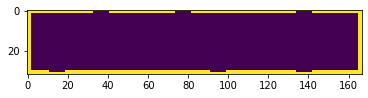

In [22]:
plt.imshow(a[3].roombox)

In [23]:
map_test = rm.map_read('corridor.png')
map_arr = np.asarray(map_test)
map_arr

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [24]:
reward_dict = {'hit_wall':-100,'movement':-10,'reached_goal':1000}
move_prob = 1
goal_position = [20,20]
testme = calculate_reward(map_arr,reward_dict,move_prob, goal_position)
for i in range(0,10):
    testme = calculate_reward(map_arr,reward_dict,move_prob, goal_position, testme)


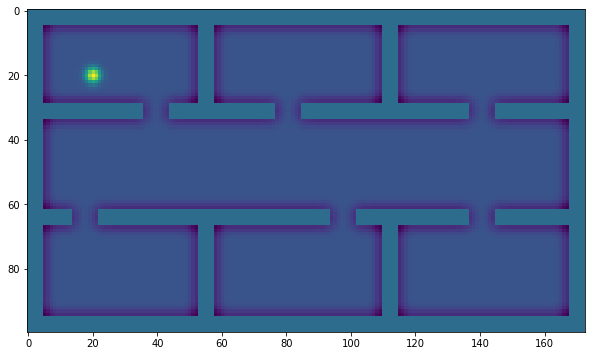

In [25]:
fig= plt.subplots(figsize=(10,10))
fig = plt.imshow(testme)

[[50, 160], [50, 159], [50, 158], [50, 157], [50, 156], [49, 156], [49, 155], [48, 155], [47, 155], [46, 155], [46, 154], [47, 154], [48, 154], [49, 154], [49, 153], [48, 153], [47, 153], [46, 153], [46, 152], [47, 152], [48, 152], [49, 152], [49, 151], [48, 151], [47, 151], [46, 151], [46, 150], [47, 150], [48, 150], [49, 150], [49, 149], [48, 149], [47, 149], [46, 149], [46, 148], [47, 148], [48, 148], [49, 148], [49, 147], [48, 147], [47, 147], [46, 147], [46, 146], [47, 146], [48, 146], [49, 146], [49, 145], [48, 145], [47, 145], [46, 145], [46, 144], [45, 144], [45, 143], [44, 143], [44, 142], [43, 142], [43, 141], [42, 141], [42, 140], [43, 140], [44, 140], [45, 140], [46, 140], [47, 140], [48, 140], [49, 140], [50, 140], [51, 140], [52, 140], [53, 140], [53, 141], [52, 141], [51, 141], [50, 141], [49, 141], [48, 141], [47, 141], [46, 141], [45, 141], [44, 141]]
bad path


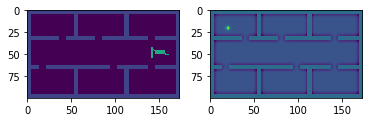

In [26]:
start = [50,160]
route1 = choose_route_look_ahead(map_arr,testme,start,[goal_position])
map_arr_r = np.copy(map_arr)
map_arr_r[start[0],start[1]] = 5

for pos in route1[1::]:
    map_arr_r[pos[0],pos[1]] = 3
    
plt.subplot(1,2,1)
plt.imshow(map_arr_r)
plt.subplot(1,2,2)
plt.imshow(testme)

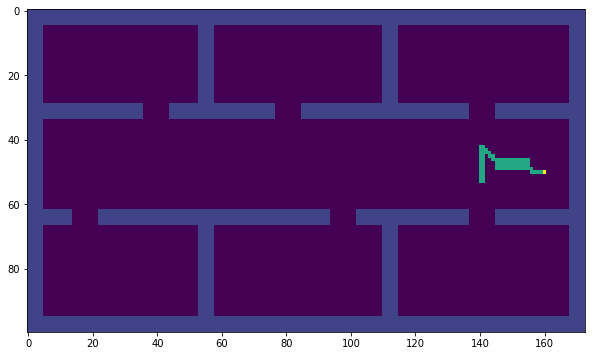

In [27]:
fig= plt.subplots(figsize=(10,10))
fig = plt.imshow(map_arr_r)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002483D0EEA60> (for post_execute):


KeyboardInterrupt: 

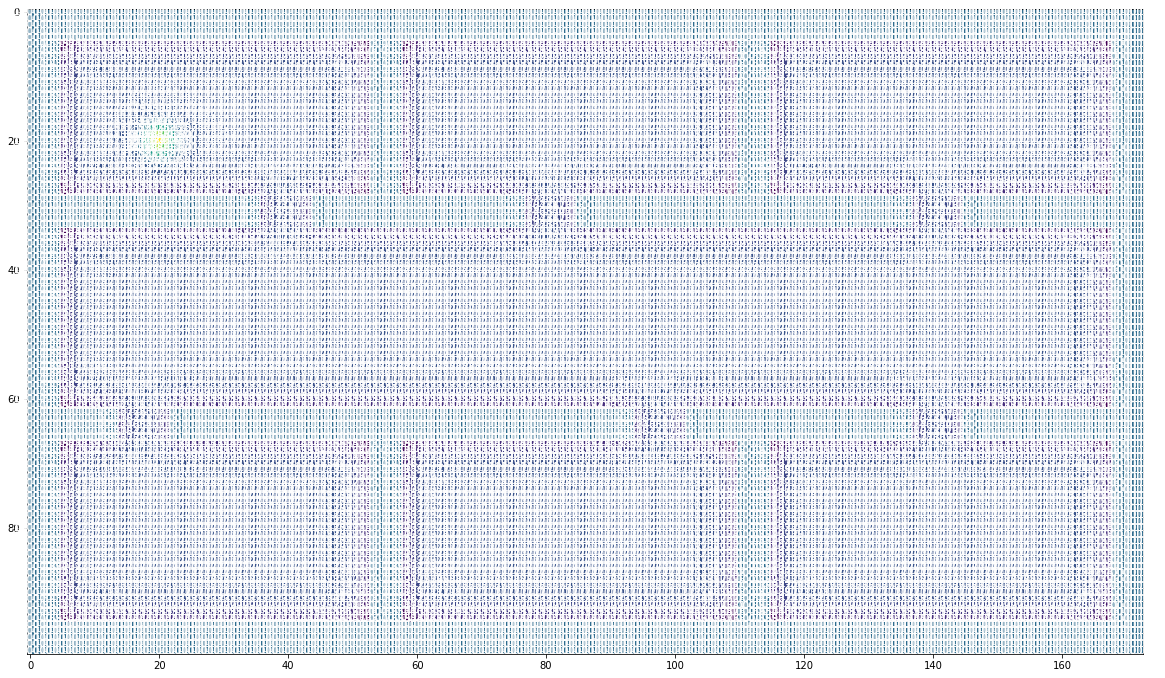

In [30]:
fig, ax = plt.subplots(figsize=(20,20))
fig = plt.imshow(testme)
result = np.zeros(map_arr.shape)
for i in range(0,map_arr.shape[0]):
    for j in range(0,map_arr.shape[1]):
        result[i,j] = int(testme[i][j])
        text = ax.text(j, i, result[i][j],
                       ha="center", va="center", color="w")

In [29]:
zoomed[1][1]

NameError: name 'zoomed' is not defined

In [ ]:
map_arr[20][20]

In [ ]:
map_arr[4,4]

In [ ]:
map_arr[29,53]

In [ ]:
room = np.copy(map_arr[4:30,4:54])

In [ ]:
room

In [ ]:
plt.imshow(world)

In [ ]:
map_arr = room

In [ ]:
world = np.pad(room, [(1, 1), (1, 1)], mode='constant', constant_values=1)

In [ ]:
world